# Cut Transpiler Passes

QVM uses cut transpiler passes to automatically virtualize binary gates in given circuits. The various types of cut passes are used to optimally virtualize binary gates to either dissect the circuit or to optimize the qubit layout. A pass is "optimal" if it virtualizes as less binary gates as possible while achieving a high amount of noise-mitigation or fragmentation.

A cut transpiler pass is a subclass of `qiskit.transpiler.basepasses.TransformationPass`. This means we can use cut passes within the `qiskit.transpiler.Passmanager`.


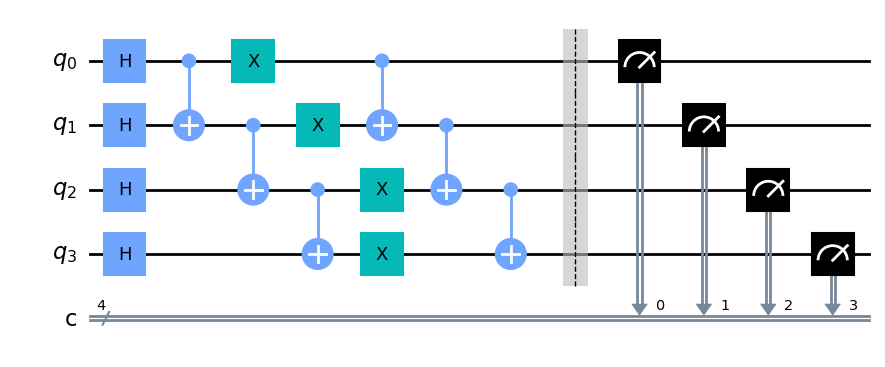

In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import PassManager
from qvm.circuit import DistributedCircuit

# The circuit used for the examples
circuit = QuantumCircuit.from_qasm_file("qasm/circuit1.qasm")
circuit.draw("mpl")


## Static Pass

The `qvm.cut.StaticCut` pass is used to virtualize every binary gate between to specific qubits in a given circuits.

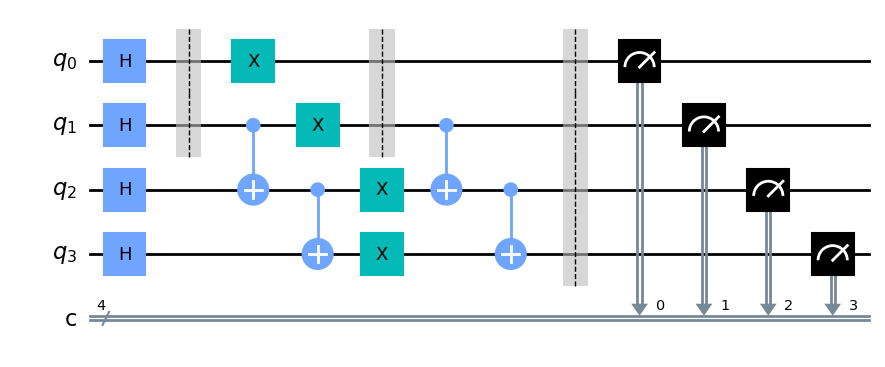

In [2]:
from qvm.cut import StaticCut

# cuts the connection between the first two qubits in the circuit
pass_ = StaticCut(qubit1=circuit.qubits[0], qubit2=circuit.qubits[1])
transp = PassManager(pass_)
cut_circ = transp.run(circuit)

cut_circ.draw("mpl")


## Dissection Passes

Dissection passes are used to optimally virtualize binary gates, so that a circuit can be dissected into two or more fragents. See next tutorial for explanation on distributed circuits.

### Bisection
The `qvm.cut.Bisection` pass is use to partition the circuit into two fragments. For this, the Kernighan-Lin bisection algorithm is used, which dissects the circuit into two approximately equally sized fragments, by virtualizing as little as gates as possible. 

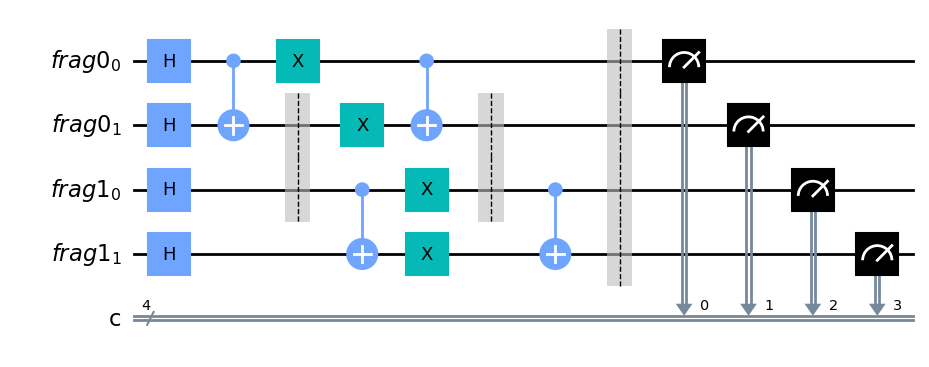

In [3]:
from qvm.cut import Bisection

bis_transp = PassManager(Bisection())
bis_circ = bis_transp.run(circuit)
# draw the distributed circuit that results from the bisection
DistributedCircuit.from_circuit(bis_circ).draw("mpl")


### Ladder Decomposition

The `qvm.cut.LadderDecomposition` pass can be used for circuits, where every binary gate is part of a binary gate ladder. A binary gate ladder means that the binary gates span from the top qubit to the bottom qubit, so that the qubits are only connected to their nearest neighbor. The pass dissects the circuit into `num_partitions` equally sized fragments.

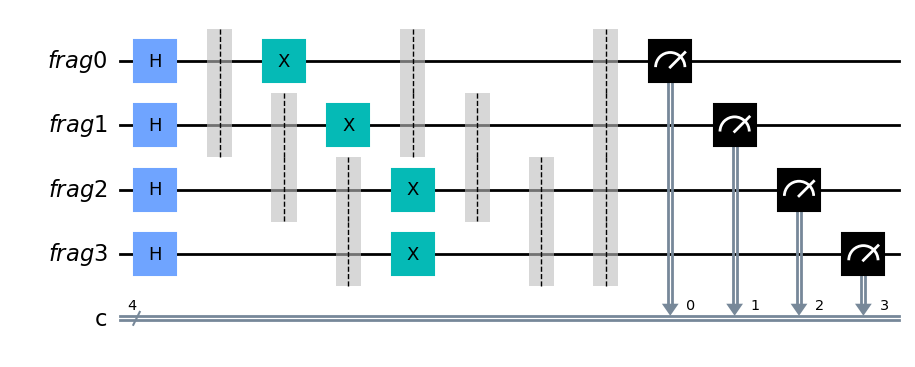

In [4]:
from qvm.cut import LadderDecomposition

# a ladder decomposition pass to partionion the circuit into 4 fragments
ladder_dec = LadderDecomposition(num_partitions=4)
lad_transp = PassManager(ladder_dec)
lad_circ = lad_transp.run(circuit)
# draw the distributed circuit that results from the ladder decomposition
DistributedCircuit.from_circuit(lad_circ).draw("mpl")


## Approximation Pass

The `qvm.cut.Approximation` pass is used to replace every virtual gate in the circuit with the respective approximations.